In [278]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor

# Create a Linear Regression object
linreg = LinearRegression()

# encoding_errors='ignore'

In [279]:
AvaData = pd.read_csv('AviationData.csv', encoding='cp1252', low_memory=False)
AvaData.columns = AvaData.columns.str.replace(".", "")
AvaData.head()


<ipython-input-279-6b5750cbb690>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  AvaData.columns = AvaData.columns.str.replace(".", "")


,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,Purposeofflight,Aircarrier,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,Broadphaseofflight,ReportStatus,PublicationDate
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [280]:
AvaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EventId               87282 non-null  object 
 1   InvestigationType     87282 non-null  object 
 2   AccidentNumber        87282 non-null  object 
 3   EventDate             87282 non-null  object 
 4   Location              87230 non-null  object 
 5   Country               87056 non-null  object 
 6   Latitude              33073 non-null  object 
 7   Longitude             33064 non-null  object 
 8   AirportCode           49322 non-null  object 
 9   AirportName           51955 non-null  object 
 10  InjurySeverity        86399 non-null  object 
 11  Aircraftdamage        84272 non-null  object 
 12  AircraftCategory      30783 non-null  object 
 13  RegistrationNumber    85965 non-null  object 
 14  Make                  87219 non-null  object 
 15  Model              

In [281]:
# interested columns only
df = AvaData.loc[:,('Country','InjurySeverity','Aircraftdamage','AircraftCategory','Make','Model','AmateurBuilt','NumberofEngines','EngineType','TotalFatalInjuries','TotalSeriousInjuries','WeatherCondition','Broadphaseofflight','TotalUninjured','TotalMinorInjuries')]
print (df)

             Country InjurySeverity Aircraftdamage AircraftCategory  \
0      United States       Fatal(2)      Destroyed              NaN   
1      United States       Fatal(4)      Destroyed              NaN   
2      United States       Fatal(3)      Destroyed              NaN   
3      United States       Fatal(2)      Destroyed              NaN   
4      United States       Fatal(1)      Destroyed              NaN   
...              ...            ...            ...              ...   
87277  United States          Fatal      Destroyed         Airplane   
87278  United States      Non-Fatal            NaN              NaN   
87279  United States          Fatal            NaN              NaN   
87280  United States      Non-Fatal            NaN              NaN   
87281  PACIFIC OCEAN      Non-Fatal    Substantial         Airplane   

                     Make     Model AmateurBuilt  NumberofEngines  \
0                 Stinson     108-3           No              1.0   
1        

In [282]:
us = df[ df['Country'] == 'United States' ].index
df = df.take(us)
df = df.reset_index(drop=True)
df

,Country,InjurySeverity,Aircraftdamage,AircraftCategory,Make,Model,AmateurBuilt,NumberofEngines,EngineType,TotalFatalInjuries,TotalSeriousInjuries,WeatherCondition,Broadphaseofflight,TotalUninjured,TotalMinorInjuries
0,United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,UNK,Cruise,0.0,0.0
1,United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,UNK,Unknown,0.0,0.0
2,United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,IMC,Cruise,NaN,NaN
3,United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,IMC,Cruise,0.0,0.0
4,United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,VMC,Approach,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80993,United States,Non-Fatal,NaN,Balloon,CAMERON BALLOONS U S,A-315,N,0.0,NaN,0.0,0.0,NaN,NaN,15.0,1.0
80994,United States,Fatal,Destroyed,Airplane,CIRRUS DESIGN CORP,SR22,N,1.0,NaN,1.0,0.0,NaN,NaN,0.0,0.0
80995,United States,Non-Fatal,NaN,NaN,CESSNA,172N,N,NaN,NaN,0.0,0.0,NaN,NaN,0.0,1.0
80996,United States,Fatal,NaN,NaN,CESSNA,172E,N,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0


In [283]:
airplane = df[ df['AircraftCategory'] == 'Airplane' ].index
df = df.take(airplane)
df = df.reset_index(drop=True)
df

,Country,InjurySeverity,Aircraftdamage,AircraftCategory,Make,Model,AmateurBuilt,NumberofEngines,EngineType,TotalFatalInjuries,TotalSeriousInjuries,WeatherCondition,Broadphaseofflight,TotalUninjured,TotalMinorInjuries
0,United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,VMC,Climb,44.0,1.0
1,United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,0.0,0.0,VMC,Takeoff,2.0,0.0
2,United States,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,IMC,Landing,2.0,0.0
3,United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,No,1.0,Reciprocating,0.0,0.0,IMC,Cruise,0.0,1.0
4,United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,No,1.0,Reciprocating,1.0,0.0,IMC,Takeoff,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23199,United States,Non-Fatal,Substantial,Airplane,Mini-MAX,1600R Sport,Y,1.0,NaN,0.0,0.0,VMC,NaN,1.0,0.0
23200,United States,Non-Fatal,Substantial,Airplane,LUSCOMBE,8A,N,1.0,NaN,0.0,0.0,VMC,NaN,2.0,0.0
23201,United States,Non-Fatal,Substantial,Airplane,PIPER,PA-22,N,1.0,NaN,0.0,0.0,NaN,NaN,1.0,0.0
23202,United States,Non-Fatal,Substantial,Airplane,PIPER,PA-30,N,2.0,NaN,0.0,0.0,NaN,NaN,2.0,0.0


In [284]:

df['InjurySeverity'].fillna('UNKNOWN',inplace = True)

df['Aircraftdamage'].fillna('UNKNOWN',inplace=True)
df['Aircraftdamage'].replace({'Unknown':'UNKNOWN'},inplace=True)
df =df[df['Aircraftdamage'].str.contains("UNKNOWN")==False]

df['AircraftCategory'].fillna('UNKNOWN',inplace=True)
df['AircraftCategory'].replace({'UNKNOWN':'Airplane'},inplace=True)
df =df[df['AircraftCategory'].str.contains("Airplane")==True]

df['Make'].fillna('UNKNOWN',inplace=True)
#df['NumberofEngines'].fillna('UNKNOWN',inplace=True)


df =df[df['EngineType'].str.contains("Unknown")==False]

df['TotalFatalInjuries'].fillna(0,inplace=True)
df['TotalMinorInjuries'].fillna(0,inplace=True)
df['TotalUninjured'].fillna(0,inplace=True)

df['TotalSeriousInjuries'].fillna(0,inplace=True)
df['Broadphaseofflight'].fillna('UNKNOWN',inplace = True)
df =df[df['Broadphaseofflight'].str.contains("Unknown")==False]
df =df[df['Broadphaseofflight'].str.contains("UNKNOWN")==False]
df['WeatherCondition'].fillna('UNKNOWN',inplace = True)
df['WeatherCondition'].replace({'Unk':'UNKNOWN'},inplace=True)
df['WeatherCondition'].replace({'UNK':'UNKNOWN'},inplace=True)
df=df[df['WeatherCondition'].str.contains("UNKNOWN")==False]

df['Make'].replace('Unknown',np.nan,inplace=True)
df['Make'].replace('Unavailable',np.nan,inplace=True)
df['Model'].replace('Unknown',np.nan,inplace=True)
df['Model'].replace('Unavailable',np.nan,inplace=True)




datacleaned = df.dropna()
datacleaned.head(50)

C:\Users\berna\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\berna\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Country,InjurySeverity,Aircraftdamage,AircraftCategory,Make,Model,AmateurBuilt,NumberofEngines,EngineType,TotalFatalInjuries,TotalSeriousInjuries,WeatherCondition,Broadphaseofflight,TotalUninjured,TotalMinorInjuries
0,United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,0.0,0.0,VMC,Climb,44.0,1.0
1,United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,0.0,0.0,VMC,Takeoff,2.0,0.0
2,United States,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,IMC,Landing,2.0,0.0
3,United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,No,1.0,Reciprocating,0.0,0.0,IMC,Cruise,0.0,1.0
4,United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,No,1.0,Reciprocating,1.0,0.0,IMC,Takeoff,0.0,0.0
5,United States,Fatal(1),Destroyed,Airplane,Navion,A,No,1.0,Reciprocating,1.0,0.0,IMC,Cruise,0.0,0.0
6,United States,Fatal(2),Destroyed,Airplane,Beech,19,No,1.0,Reciprocating,2.0,0.0,IMC,Cruise,0.0,0.0
8,United States,Non-Fatal,Substantial,Airplane,Cessna,172,No,1.0,Reciprocating,0.0,0.0,VMC,Taxi,1.0,0.0
9,United States,Non-Fatal,Substantial,Airplane,Cessna,152,No,1.0,Reciprocating,0.0,0.0,VMC,Takeoff,1.0,0.0
10,United States,Non-Fatal,Substantial,Airplane,Cessna,150L,No,1.0,Reciprocating,0.0,0.0,VMC,Approach,2.0,0.0


In [285]:
datacleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6147 entries, 0 to 6388
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               6147 non-null   object 
 1   InjurySeverity        6147 non-null   object 
 2   Aircraftdamage        6147 non-null   object 
 3   AircraftCategory      6147 non-null   object 
 4   Make                  6147 non-null   object 
 5   Model                 6147 non-null   object 
 6   AmateurBuilt          6147 non-null   object 
 7   NumberofEngines       6147 non-null   float64
 8   EngineType            6147 non-null   object 
 9   TotalFatalInjuries    6147 non-null   float64
 10  TotalSeriousInjuries  6147 non-null   float64
 11  WeatherCondition      6147 non-null   object 
 12  Broadphaseofflight    6147 non-null   object 
 13  TotalUninjured        6147 non-null   float64
 14  TotalMinorInjuries    6147 non-null   float64
dtypes: float64(5), object

In [286]:
print(datacleaned)

            Country InjurySeverity Aircraftdamage AircraftCategory  \
0     United States      Non-Fatal    Substantial         Airplane   
1     United States      Non-Fatal    Substantial         Airplane   
2     United States      Non-Fatal    Substantial         Airplane   
3     United States      Non-Fatal      Destroyed         Airplane   
4     United States       Fatal(1)      Destroyed         Airplane   
...             ...            ...            ...              ...   
6384  United States      Non-Fatal    Substantial         Airplane   
6385  United States      Non-Fatal    Substantial         Airplane   
6386  United States       Fatal(1)    Substantial         Airplane   
6387  United States      Non-Fatal    Substantial         Airplane   
6388  United States      Non-Fatal    Substantial         Airplane   

                                Make   Model AmateurBuilt  NumberofEngines  \
0                  Mcdonnell Douglas     DC9           No              2.0   
1  

In [287]:
datacleaned.head()

,Country,InjurySeverity,Aircraftdamage,AircraftCategory,Make,Model,AmateurBuilt,NumberofEngines,EngineType,TotalFatalInjuries,TotalSeriousInjuries,WeatherCondition,Broadphaseofflight,TotalUninjured,TotalMinorInjuries
0,United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,0.0,0.0,VMC,Climb,44.0,1.0
1,United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,0.0,0.0,VMC,Takeoff,2.0,0.0
2,United States,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,IMC,Landing,2.0,0.0
3,United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,No,1.0,Reciprocating,0.0,0.0,IMC,Cruise,0.0,1.0
4,United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,No,1.0,Reciprocating,1.0,0.0,IMC,Takeoff,0.0,0.0


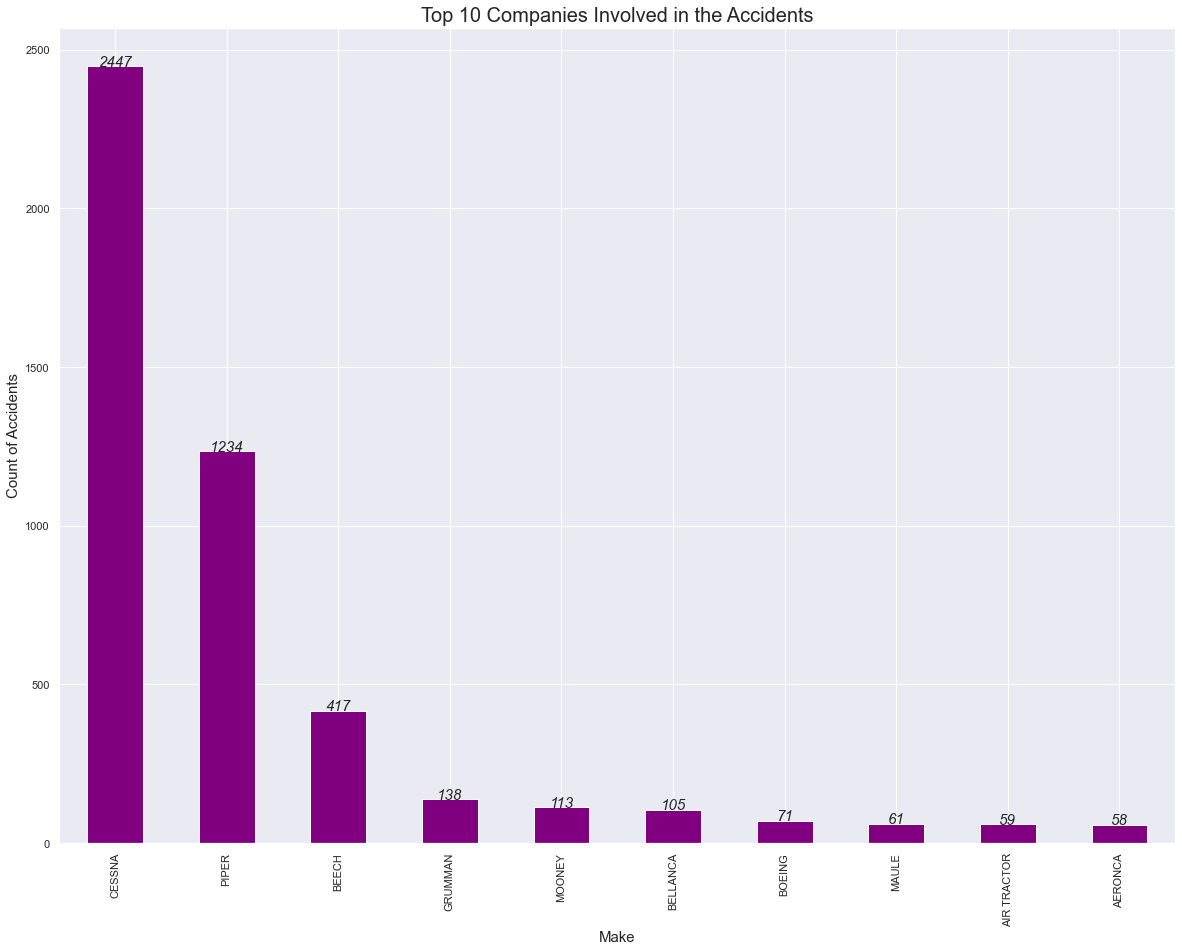

In [288]:
# Evaluate the Notorious Companies

plt.figure(figsize=(20,15))
datacleaned['Make'].str.upper().value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='Purple')
plt.xticks(rotation=90)
plt.xlabel("Make", size=15)
plt.ylabel("Count of Accidents", size=15)
plt.title("Top 10 Companies Involved in the Accidents", size=20)
y=datacleaned['Make'].str.upper().value_counts().sort_values(ascending=False)[:10]
for i, v in enumerate(y):
    plt.text(i, v, str(v), fontsize=15, style='oblique', horizontalalignment='center')
plt.show()


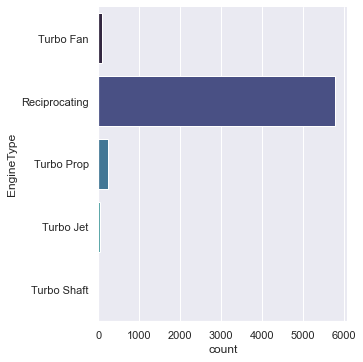

In [217]:
sb.catplot(y ="EngineType",data=datacleaned , kind= "count", palette = 'mako')

<AxesSubplot:xlabel='EngineType', ylabel='TotalMinorInjuries'>

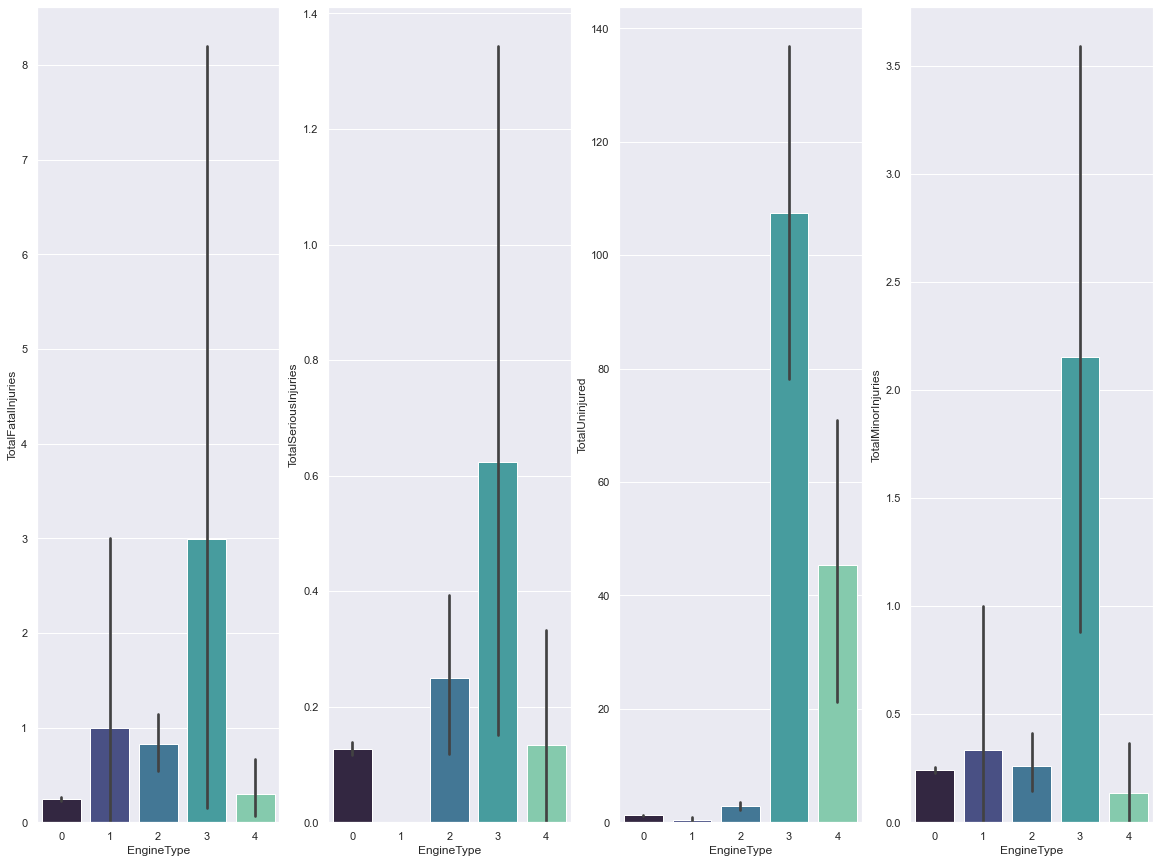

In [275]:
# engine type on fatalities and injury
f, axes=plt.subplots(1,4 , figsize= (20,15))
sb.barplot(x = 'EngineType',y='TotalFatalInjuries' , data = datacleaned , palette = 'mako',ax= axes[0])
sb.barplot(x = 'EngineType',y='TotalSeriousInjuries' , data = datacleaned , palette = 'mako',ax= axes[1])
sb.barplot(x = 'EngineType',y='TotalUninjured' , data = datacleaned , palette = 'mako',ax= axes[2])
sb.barplot(x = 'EngineType',y='TotalMinorInjuries' , data = datacleaned , palette = 'mako',ax= axes[3])

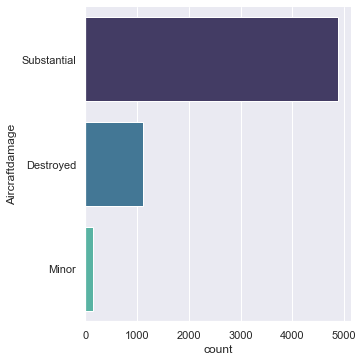

In [219]:
sb.catplot(y ="Aircraftdamage",data=datacleaned , kind= "count", palette = 'mako')

<AxesSubplot:xlabel='Aircraftdamage', ylabel='TotalMinorInjuries'>

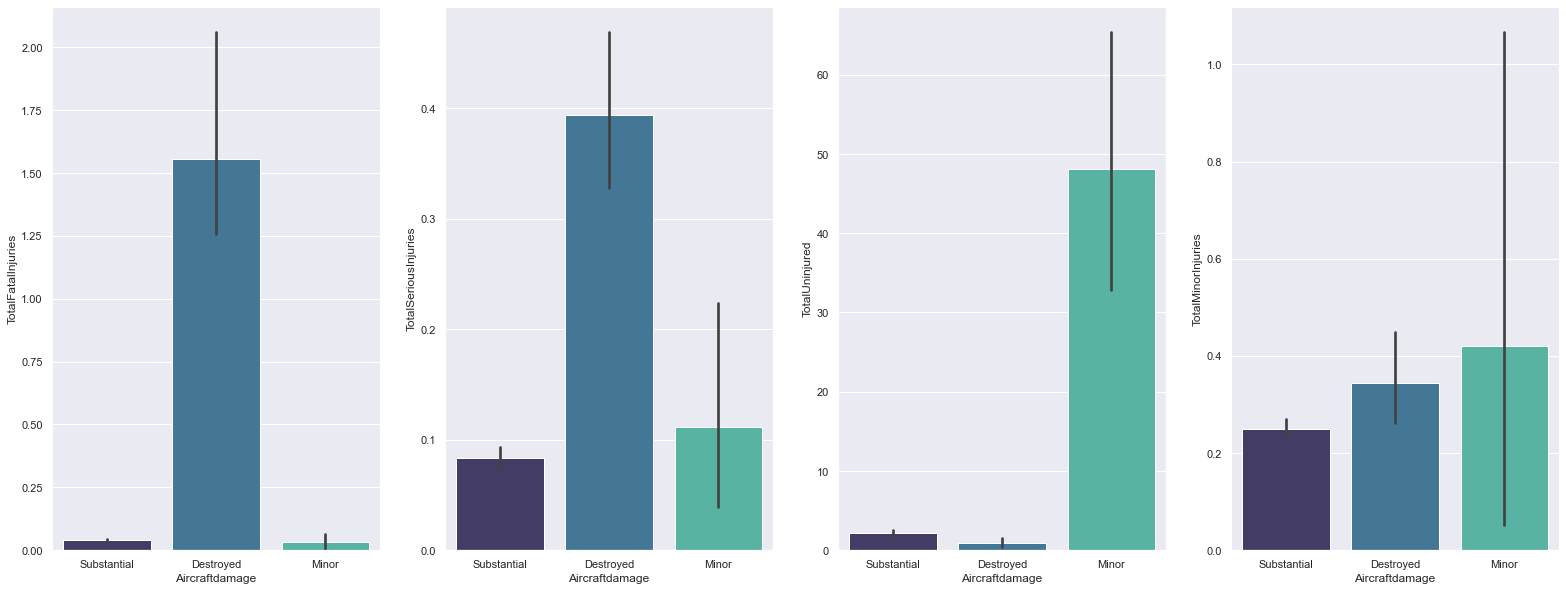

In [220]:
# engine type on fatalities and injury
f, axes=plt.subplots(1,4 , figsize= (27,10))
sb.barplot(x = 'Aircraftdamage',y='TotalFatalInjuries' , data = datacleaned , palette = 'mako',ax= axes[0])
sb.barplot(x = 'Aircraftdamage',y='TotalSeriousInjuries' , data = datacleaned , palette = 'mako',ax= axes[1])
sb.barplot(x = 'Aircraftdamage',y='TotalUninjured' , data = datacleaned , palette = 'mako',ax= axes[2])
sb.barplot(x = 'Aircraftdamage',y='TotalMinorInjuries' , data = datacleaned , palette = 'mako',ax= axes[3])

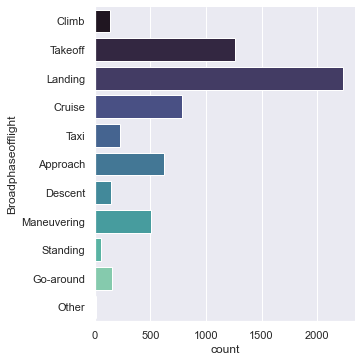

In [221]:
sb.catplot(y ="Broadphaseofflight",data=datacleaned , kind= "count", palette = 'mako')

<AxesSubplot:xlabel='Broadphaseofflight', ylabel='TotalSeriousInjuries'>

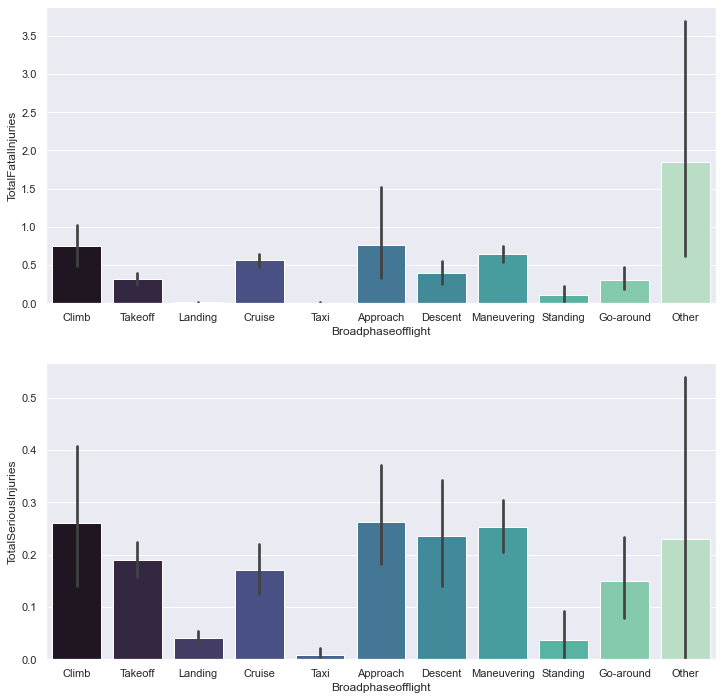

In [222]:
# engine type on fatalities and injury
f, axes=plt.subplots(2,1 , figsize= (12,12))
sb.barplot(x = 'Broadphaseofflight',y='TotalFatalInjuries' , data = datacleaned , palette = 'mako',ax= axes[0])
sb.barplot(x = 'Broadphaseofflight',y='TotalSeriousInjuries' , data = datacleaned , palette = 'mako',ax= axes[1])
#sb.barplot(x = 'Broadphaseofflight',y='TotalUninjured' , data = datacleaned , palette = 'mako',ax= axes[2])
#sb.barplot(x = 'Broadphaseofflight',y='TotalMinorInjuries' , data = datacleaned , palette = 'mako',ax= axes[3])

<AxesSubplot:xlabel='Broadphaseofflight', ylabel='TotalMinorInjuries'>

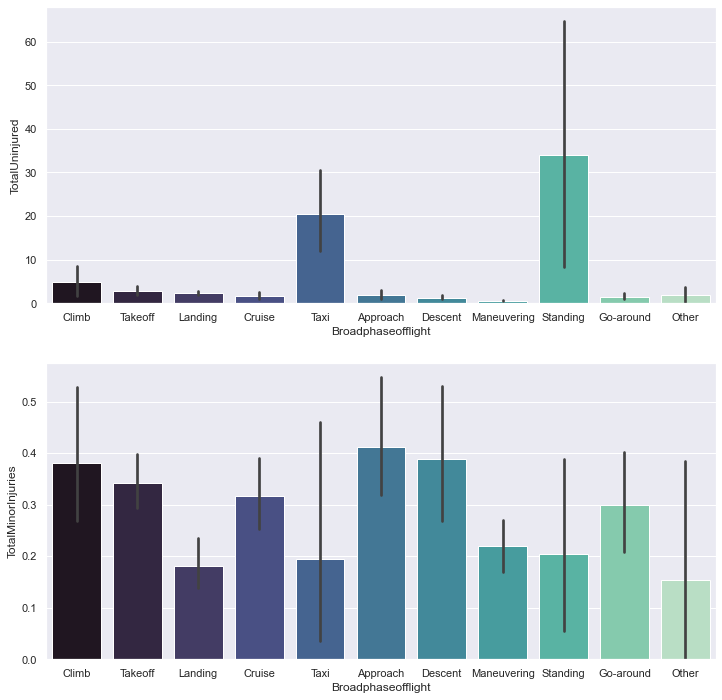

In [223]:
# engine type on fatalities and injury
f, axes=plt.subplots(2,1 , figsize= (12,12))
sb.barplot(x = 'Broadphaseofflight',y='TotalUninjured' , data = datacleaned , palette = 'mako',ax= axes[0])
sb.barplot(x = 'Broadphaseofflight',y='TotalMinorInjuries' , data = datacleaned , palette = 'mako',ax= axes[1])

In [224]:
datacleaned.corr()

,NumberofEngines,TotalFatalInjuries,TotalSeriousInjuries,TotalUninjured,TotalMinorInjuries
NumberofEngines,1.000000,0.137078,0.097358,0.320521,0.073464
TotalFatalInjuries,0.137078,1.000000,0.537167,-0.011936,-0.002961
TotalSeriousInjuries,0.097358,0.537167,1.000000,0.008499,0.142601
TotalUninjured,0.320521,-0.011936,0.008499,1.000000,0.106844
TotalMinorInjuries,0.073464,-0.002961,0.142601,0.106844,1.000000


<AxesSubplot:>

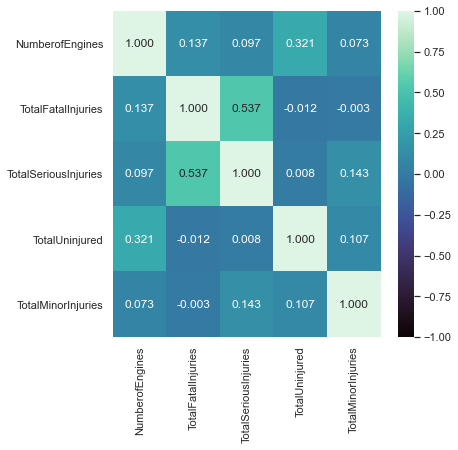

In [225]:
f=plt.figure(figsize=(6,6))
sb.heatmap(datacleaned.corr(), vmin=-1, vmax=1, annot= True, fmt=".3f", cmap="mako" )

In [226]:
# prep data for regression
# strings to integers
datacleaned['EngineType'].replace('Reciprocating', 0, inplace = True)
datacleaned['EngineType'].replace('Turbo Shaft', 1, inplace = True)
datacleaned['EngineType'].replace('Turbo Prop', 2, inplace = True)
datacleaned['EngineType'].replace('Turbo Fan', 3, inplace = True)
datacleaned['EngineType'].replace('Turbo Jet', 4, inplace = True)

datacleaned['Broadphaseofflight'].replace('Landing', 0, inplace = True)
datacleaned['Broadphaseofflight'].replace('Takeoff', 1, inplace = True)
datacleaned['Broadphaseofflight'].replace('Cruise', 2, inplace = True)
datacleaned['Broadphaseofflight'].replace('Maneuvering', 3, inplace = True)
datacleaned['Broadphaseofflight'].replace('Approach', 4, inplace = True)
datacleaned['Broadphaseofflight'].replace('Climb', 5, inplace = True)
datacleaned['Broadphaseofflight'].replace('Descent', 6, inplace = True)
datacleaned['Broadphaseofflight'].replace('Taxi', 7, inplace = True)
datacleaned['Broadphaseofflight'].replace('Go-around', 8, inplace = True)
datacleaned['Broadphaseofflight'].replace('Standing', 9, inplace = True)
datacleaned['Broadphaseofflight'].replace('Other', 10, inplace = True)

datacleaned['WeatherCondition'].replace('VMC', 1, inplace = True)
datacleaned['WeatherCondition'].replace('IMC', 0, inplace = True)

datacleaned['Aircraftdamage'].replace('Minor', 0, inplace = True)
datacleaned['Aircraftdamage'].replace('Substantial', 1, inplace = True)
datacleaned['Aircraftdamage'].replace('Destroyed', 2, inplace = True)


C:\Users\berna\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [227]:
# Make and model has lots of strings, encoder used to label them as values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

datacleaned['Make'] = le.fit_transform(datacleaned['Make'])
datacleaned['Model'] = le.fit_transform(datacleaned['Model'])

<ipython-input-227-991b4bc93dec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datacleaned['Make'] = le.fit_transform(datacleaned['Make'])
<ipython-input-227-991b4bc93dec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datacleaned['Model'] = le.fit_transform(datacleaned['Model'])


In [228]:
# check
print(datacleaned['Make'])

0       418
1       125
2       125
3        76
4       125
       ... 
6384    125
6385    225
6386    137
6387    391
6388    498
Name: Make, Length: 6147, dtype: int32


In [229]:
#Import LinearRegression tool
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [230]:
datacleaned_train, datacleaned_test = train_test_split(datacleaned, test_size = 0.3)

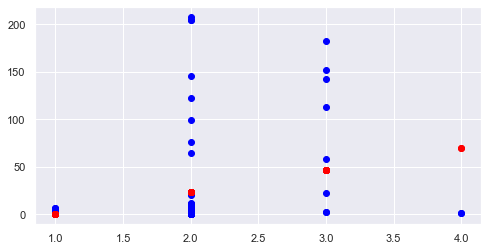

In [231]:
# Predicting uninjured using number of engines
y_train = pd.DataFrame(datacleaned_train['TotalUninjured'])
X_train = pd.DataFrame(datacleaned_train['NumberofEngines'])
y_test = pd.DataFrame(datacleaned_test['TotalUninjured'])
X_test = pd.DataFrame(datacleaned_test['NumberofEngines'])

linreg = LinearRegression()
linreg.fit(X_train,y_train)

y_test_pred = linreg.predict(X_test)
f, axes = plt.subplots(1, 1, figsize=(8,4))
plt.scatter(X_test, y_test, color = "blue")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

In [232]:
y = pd.DataFrame(datacleaned["TotalUninjured"])
X = pd.DataFrame(datacleaned[["EngineType", "NumberofEngines", "Broadphaseofflight"]])

In [233]:
# Split data into train and test
from sklearn.model_selection import train_test_split
cleanData_train, cleanData_test = train_test_split(datacleaned, test_size = 0.2)

combined = ["EngineType", "NumberofEngines", "Broadphaseofflight","WeatherCondition",'Aircraftdamage']
#Extract Response and Predictors
X_train = cleanData_train[combined]
y_train = cleanData_train['InjurySeverity']

X_test = cleanData_test[combined]
y_test = cleanData_test['InjurySeverity']

In [234]:
#Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
base = RandomForestClassifier(n_estimators=100)

#Fit train data
base.fit(X_train,y_train)

# Predict response variable
y_train_pred = base.predict(X_train)
y_test_pred = base.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Calculate Accuracy of the predictor model
print("Accuracy (train dataset):",metrics.accuracy_score(y_train, y_train_pred))
# Calculate Accuracy of the predictor model
print("Accuracy (test dataset):",metrics.accuracy_score(y_test, y_test_pred))

Accuracy (train dataset): 0.8928208257067317
Accuracy (test dataset): 0.8747967479674796


In [235]:
imp_features = base.feature_importances_
labels = X_train.columns

In [236]:
imptfeatures = pd.Series(imp_features,index=labels).sort_values(ascending=False)
imptfeatures

Aircraftdamage        0.605252
Broadphaseofflight    0.211987
WeatherCondition      0.076249
EngineType            0.061046
NumberofEngines       0.045465
dtype: float64

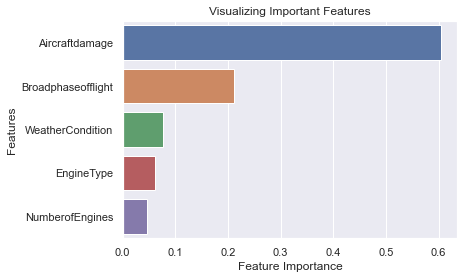

In [237]:
# using barplots to show importane of each feature
sb.barplot(x = imptfeatures, y = imptfeatures.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [238]:
combined = ["EngineType", "NumberofEngines", "Broadphaseofflight",'WeatherCondition','Aircraftdamage','Model','Make']
# Extract Response and Predictors
X_train = cleanData_train[combined]
y_train = cleanData_train['TotalUninjured']

In [239]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2,
                                                   random_state = 0)

In [240]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100
                                  , random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [241]:
y_pred = regressor.predict(X_test)
y_pred

array([3.47500000e-01, 1.36284848e+00, 1.92000000e+00, 1.00000000e-02,
       1.76918312e+00, 0.00000000e+00, 1.02110714e+00, 2.30917460e+00,
       1.79592857e+00, 1.87153175e+00, 1.38081796e+00, 1.45291667e+00,
       1.57546889e+00, 2.41666667e-01, 4.54000000e-01, 2.90000000e-01,
       8.40380952e-01, 1.38442857e+00, 1.32828571e+00, 5.16666667e-02,
       1.06716885e+00, 8.00000000e-02, 1.23533535e+00, 1.69500000e+00,
       4.50000000e-02, 1.21500000e+00, 1.16000000e+00, 4.90000000e-01,
       1.13000000e+00, 2.05100000e+02, 5.00000000e-02, 3.30650000e+00,
       4.50000000e-01, 9.73333333e-01, 1.00000000e-02, 1.83052381e+00,
       0.00000000e+00, 3.05500000e+00, 3.10000000e-01, 1.84333333e+00,
       1.67897253e+00, 3.21164286e+00, 2.00000000e-01, 1.59990106e+00,
       2.01033333e+00, 1.18166667e+00, 0.00000000e+00, 2.27000000e+00,
       1.64000000e+00, 2.13108333e+00, 0.00000000e+00, 1.30000000e-01,
       1.49108734e+00, 9.92500000e-01, 1.38081796e+00, 0.00000000e+00,
      

In [242]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6064644920029079

In [243]:
impv2 = regressor.feature_importances_
feature_importancesv2 = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, impv2)]

feature_importances = sorted(feature_importancesv2, key = lambda x: x[1], reverse = True)
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: EngineType Importance: 0.39
Variable: Model Importance: 0.18
Variable: Make Importance: 0.14
Variable: NumberofEngines Importance: 0.13
Variable: Broadphaseofflight Importance: 0.11
Variable: Aircraftdamage Importance: 0.04
Variable: WeatherCondition Importance: 0.02


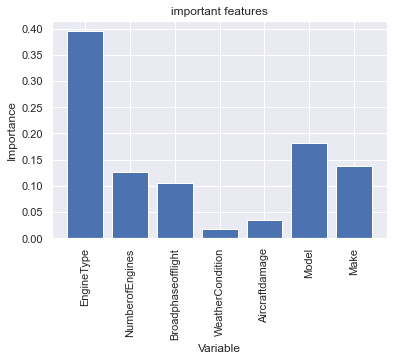

In [244]:
# using bar plots to visualize importance of variables to predict uninjured
x_values = list(range(len(impv2)))
plt.bar(x_values, impv2, orientation = 'vertical')
plt.xticks(x_values, X_train.columns, rotation='vertical')
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('important features');

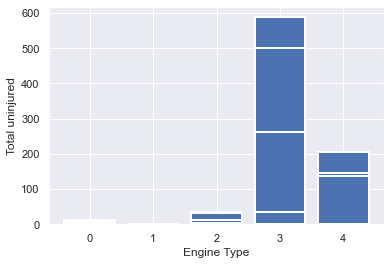

In [268]:
EngineTypedata = datacleaned['EngineType']
uninjureddata   = datacleaned['TotalUninjured']

plt.bar(EngineTypedata, uninjureddata, linewidth=2)
plt.xlabel("Engine Type")
plt.ylabel("Total uninjured")
plt.show()

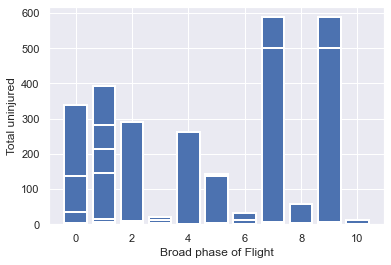

In [269]:
broadphaseflightdata = datacleaned['Broadphaseofflight']
uninjureddata   = datacleaned['TotalUninjured']

plt.bar(broadphaseflightdata, uninjureddata, linewidth=2)
plt.xlabel("Broad phase of Flight")
plt.ylabel("Total uninjured")
plt.show()

In [245]:
AvaData = pd.read_csv('AviationData.csv', encoding='cp1252', low_memory=False)
AvaData = AvaData.fillna(0)
AvaData[['Number.of.Engines','Total.Uninjured']] = AvaData[['Number.of.Engines','Total.Uninjured']].astype(np.int64)
AvaData.columns = AvaData.columns.str.replace(".", "")
AvaData.head()

<ipython-input-245-9ec6887d9cc2>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  AvaData.columns = AvaData.columns.str.replace(".", "")


,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,Purposeofflight,Aircarrier,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,Broadphaseofflight,ReportStatus,PublicationDate
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,0,0,0,0,...,Personal,0,2.0,0.0,0.0,0,UNK,Cruise,Probable Cause,0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,0,0,0,0,...,Personal,0,4.0,0.0,0.0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,0,0,...,Personal,0,3.0,0.0,0.0,0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,0,0,0,0,...,Personal,0,2.0,0.0,0.0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,0,0,0,0,...,Personal,0,1.0,2.0,0.0,0,VMC,Approach,Probable Cause,16-04-1980


In [246]:
InjurySeverity = pd.DataFrame(AvaData[['InjurySeverity','EngineType','Broadphaseofflight','NumberofEngines','TotalUninjured']])

InjurySeverity['InjurySeverity'] = InjurySeverity['InjurySeverity'].replace(to_replace="Fatal.*", value="Fatal",regex=True)

InjurySeverity = InjurySeverity[(InjurySeverity['InjurySeverity'] == 'Fatal') 
                  | (InjurySeverity['InjurySeverity'] == 'Non-Fatal')]
                                

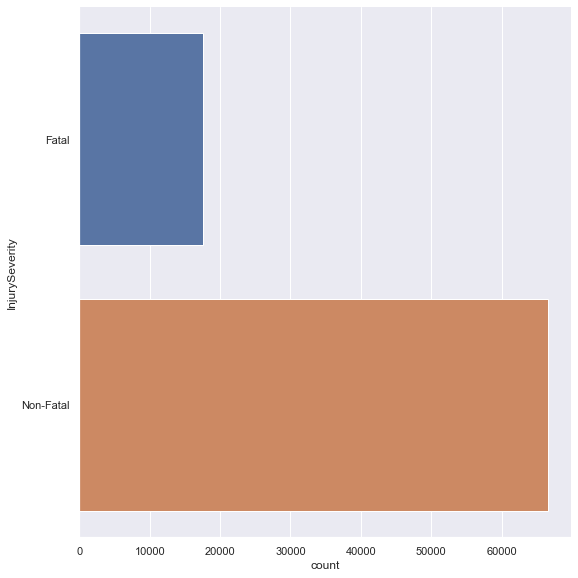

In [247]:
sb.catplot(y = 'InjurySeverity', data = InjurySeverity, kind = "count", height = 8)

From this graph we can see that most of the airline accidents are non-fatal. 

## Categorical Variables

In [248]:
Non_Fatal_Injury = pd.DataFrame(InjurySeverity[['InjurySeverity','EngineType','Broadphaseofflight','NumberofEngines','TotalUninjured']])
Non_Fatal_Injury = Non_Fatal_Injury[(Non_Fatal_Injury['InjurySeverity'] == 'Non-Fatal')]

Non_Fatal_Injury.index = np.arange(1, len(Non_Fatal_Injury) + 1)
Non_Fatal_Injury.head()

,InjurySeverity,EngineType,Broadphaseofflight,NumberofEngines,TotalUninjured
1,Non-Fatal,Turbo Fan,Climb,2,44
2,Non-Fatal,Reciprocating,Takeoff,1,2
3,Non-Fatal,Reciprocating,Landing,2,2
4,Non-Fatal,Reciprocating,Cruise,1,0
5,Non-Fatal,Reciprocating,Approach,1,1


In [249]:
NonFatalCat = pd.DataFrame(Non_Fatal_Injury[['EngineType','Broadphaseofflight']])

NonFatalCat['EngineType'] = NonFatalCat['EngineType'].astype('category')
NonFatalCat['Broadphaseofflight'] = NonFatalCat['Broadphaseofflight'].astype('category')

NonFatalCat.head()

,EngineType,Broadphaseofflight
1,Turbo Fan,Climb
2,Reciprocating,Takeoff
3,Reciprocating,Landing
4,Reciprocating,Cruise
5,Reciprocating,Approach


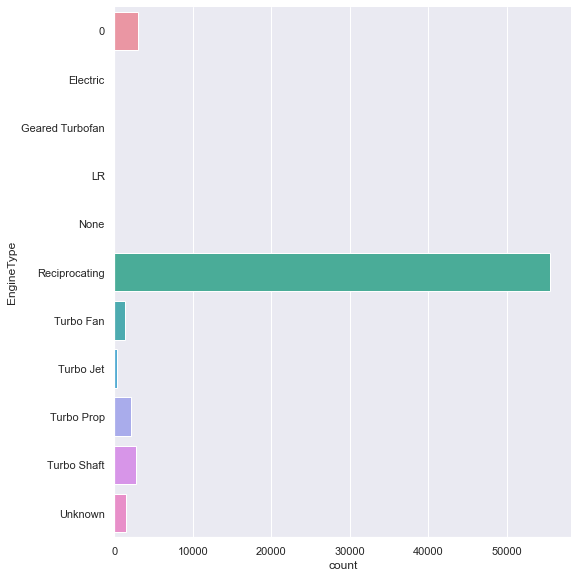

In [250]:
sb.catplot(y = 'EngineType', data = NonFatalCat, kind = "count", height = 8)

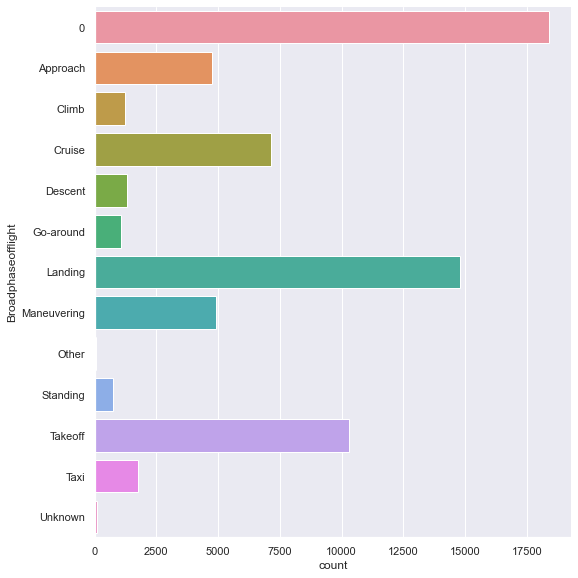

In [251]:
sb.catplot(y = 'Broadphaseofflight', data = NonFatalCat, kind = "count", height = 8)

<AxesSubplot:xlabel='Broadphaseofflight', ylabel='EngineType'>

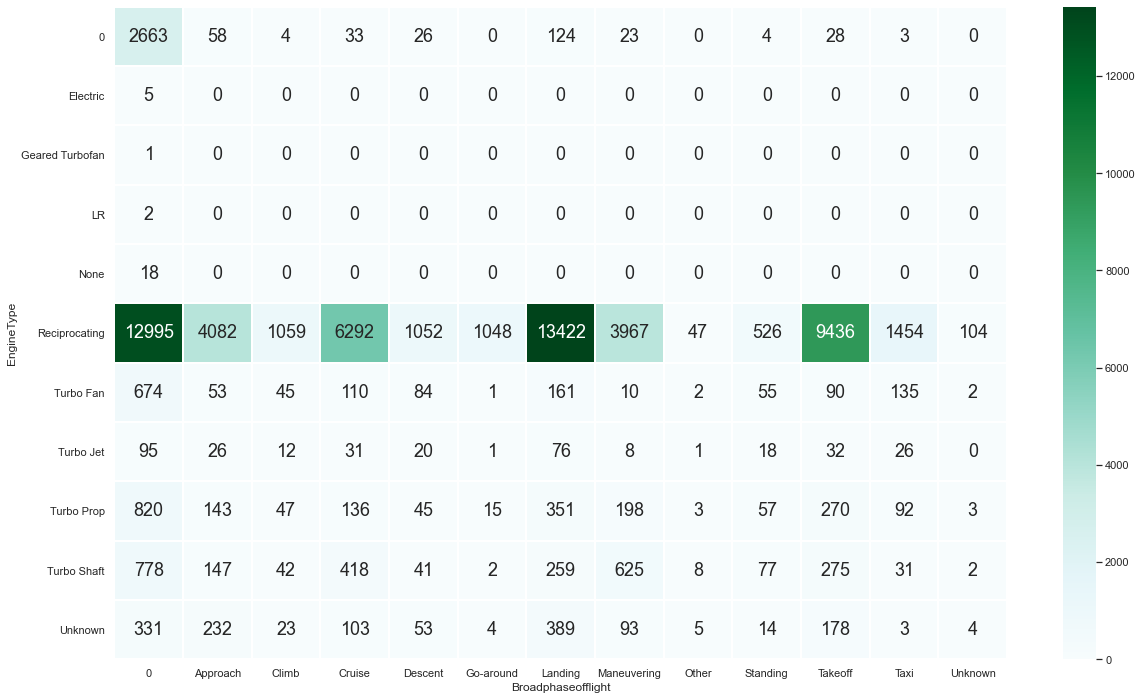

In [252]:
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.heatmap(NonFatalCat.groupby(['EngineType', 'Broadphaseofflight']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

We can see that on Landing phase of flight and Reciprocating flight has the highest number of Non fatality 

In [253]:
NonFatalCat.groupby(['EngineType', 'Broadphaseofflight']).size().unstack()

Broadphaseofflight,0,Approach,Climb,Cruise,Descent,Go-around,Landing,Maneuvering,Other,Standing,Takeoff,Taxi,Unknown
EngineType,,,,,,,,,,,,,
0,2663,58,4,33,26,0,124,23,0,4,28,3,0
Electric,5,0,0,0,0,0,0,0,0,0,0,0,0
Geared Turbofan,1,0,0,0,0,0,0,0,0,0,0,0,0
LR,2,0,0,0,0,0,0,0,0,0,0,0,0
None,18,0,0,0,0,0,0,0,0,0,0,0,0
Reciprocating,12995,4082,1059,6292,1052,1048,13422,3967,47,526,9436,1454,104
Turbo Fan,674,53,45,110,84,1,161,10,2,55,90,135,2
Turbo Jet,95,26,12,31,20,1,76,8,1,18,32,26,0
Turbo Prop,820,143,47,136,45,15,351,198,3,57,270,92,3


In [254]:
Uninjured = pd.DataFrame(Non_Fatal_Injury['TotalUninjured'])
UninjuredCat = pd.concat([NonFatalCat, Uninjured], axis = 1).reindex(NonFatalCat.index)
UninjuredCat.head()

,EngineType,Broadphaseofflight,TotalUninjured
1,Turbo Fan,Climb,44
2,Reciprocating,Takeoff,2
3,Reciprocating,Landing,2
4,Reciprocating,Cruise,0
5,Reciprocating,Approach,1


<AxesSubplot:xlabel='EngineType', ylabel='TotalUninjured'>

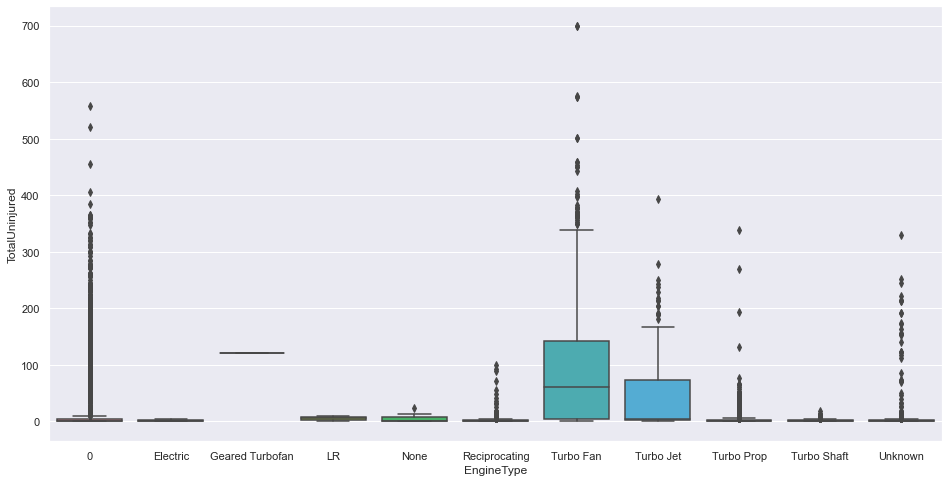

In [255]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'EngineType', y = 'TotalUninjured', data = UninjuredCat)

<AxesSubplot:xlabel='Broadphaseofflight', ylabel='TotalUninjured'>

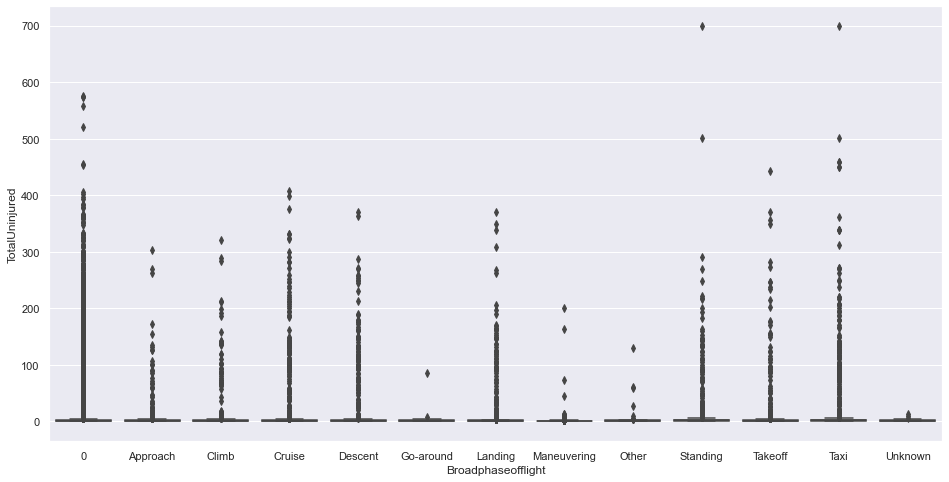

In [256]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Broadphaseofflight', y = 'TotalUninjured', data = UninjuredCat)

## Linear Reg

In [257]:
SafeEngineNum = pd.DataFrame(Non_Fatal_Injury[['NumberofEngines','TotalUninjured']])
SafeEngineNum.head()

,NumberofEngines,TotalUninjured
1,2,44
2,1,2
3,2,2
4,1,0
5,1,1


In [258]:
SafeEngineNum.shape

(66561, 2)

                 NumberofEngines  TotalUninjured
NumberofEngines         1.000000        0.208441
TotalUninjured          0.208441        1.000000


<AxesSubplot:>

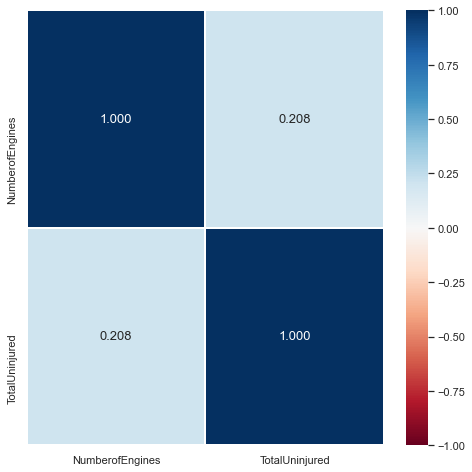

In [259]:
print(SafeEngineNum.corr())

f, axes = plt.subplots(1, 1, figsize=(8, 8))
sb.heatmap(SafeEngineNum.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".3f", annot_kws = {"size": 13}, cmap = "RdBu")

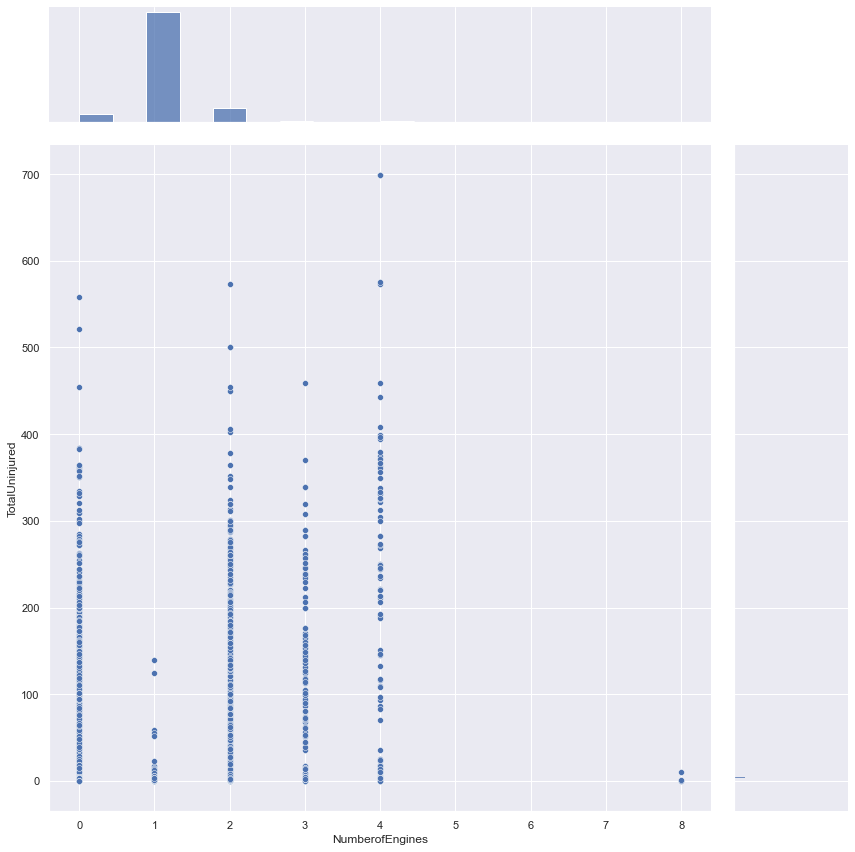

In [260]:
sb.jointplot(data = SafeEngineNum, x = "NumberofEngines", y = "TotalUninjured", height = 12)

In [261]:
NumEngine = pd.DataFrame(SafeEngineNum["NumberofEngines"])
Uninjured = pd.DataFrame(SafeEngineNum["TotalUninjured"])

In [262]:
# Split the dataset into Train and Test       
NumEngine_train = pd.DataFrame(NumEngine[:49920])
NumEngine_test  = pd.DataFrame(NumEngine[-16640:])
Uninjured_train = pd.DataFrame(Uninjured[:49920])
Uninjured_test  = pd.DataFrame(Uninjured[-16640:])

# Check the sample sizes
print("Train Set :", NumEngine_train.shape, Uninjured_train.shape)
print("Test Set  :", NumEngine_test.shape, Uninjured_test.shape)

Train Set : (49920, 1) (49920, 1)
Test Set  : (16640, 1) (16640, 1)


In [263]:
linreg.fit(NumEngine_train,Uninjured_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-10.47710222]
Coefficients 	: a =  [[12.85287052]]


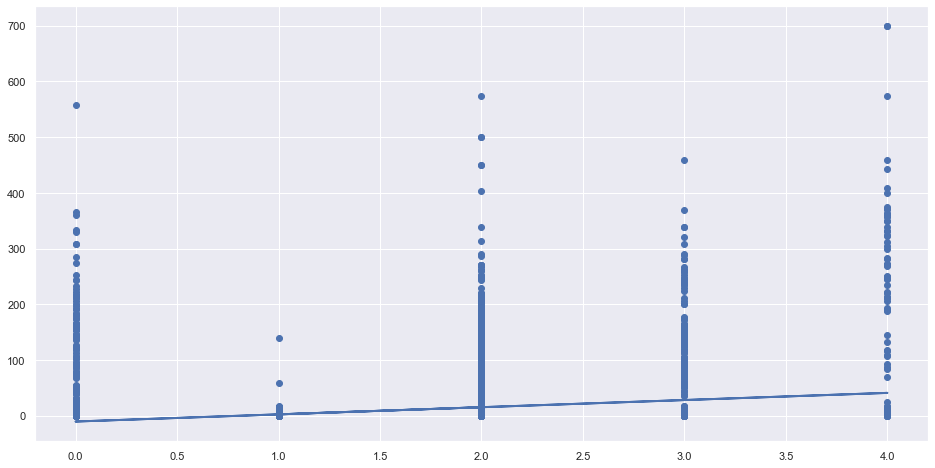

In [264]:
x = NumEngine_train
y = linreg.intercept_ + linreg.coef_ * NumEngine_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(NumEngine_train,Uninjured_train)
plt.plot(x, y, linewidth = 2)
plt.show()


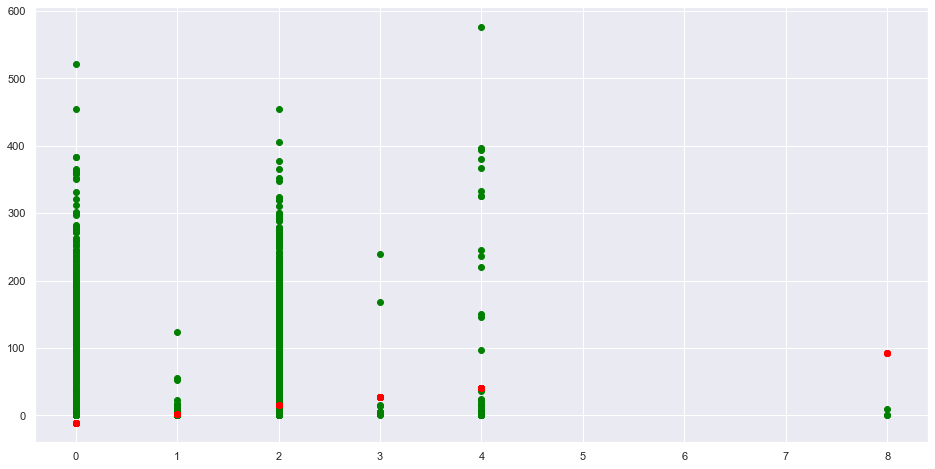

In [265]:
# Predict SalePrice values corresponding to GrLivArea
Uninjured_test_pred = linreg.predict(NumEngine_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(NumEngine_test, Uninjured_test, color = "green")
plt.scatter(NumEngine_test, Uninjured_test_pred, color = "red")
plt.show()

In [266]:
print("Explained Variance (R^2) \t:", linreg.score(NumEngine_train, Uninjured_train))

Explained Variance (R^2) 	: 0.07690521685374485


In [267]:
print("Explained Variance (R^2) \t:", linreg.score(NumEngine_test, Uninjured_test))

Explained Variance (R^2) 	: -0.008497145876687817
